In [1]:
import numpy as np
from __future__ import unicode_literals
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt

# О телесных углах пикселей
*Моя попытка разобраться в том, как меняется величина телесного угла одного пикселя в зависимости от расположения пикселя на кадре, а также в том, как эта величина соотносится с угловым разрешением объектива.  
Величина телесного угла пикселя используется при калибровке камер по звездам.*

Рассмотрены три способа определить величину телесного угла, приходящегося на один пиксель, для камер **KEO** и **S1C**:  
1. По формуле $\Omega_{pix} \approx \frac{S_{pix}}{f^2}$, где $S_{pix}$ - площадь пикселя, $f$ - фокусное расстояние.  
2. Из формулы для полного телесного угла для объектива с заданным полем зрения.
3. По расчитанным угловым разрешениям матрицы.  

Способы 2 и 3 используют также информацию о типе проекции, используемой в камере.

### Выводы сразу:
1. Телесный угол, приходящийся на один пиксель матрицы, **уменьшается к краю кадра** (на 25% для **KEO** и на 5% для **S1C** от значения в центре кадра). Это значит, что угловое разрешение, которое обеспечивает матрица, к краю кадра **увеличивается**, в отличие от углового разрешения, которое обеспечивается оптикой (угловое разрешение объективов уменьшается к краю кадра).
2. В области кадра, где обычно наблюдается искусственное свечение, телесный угол одного пикселя всего лишь **на малую величину** меньше телесного угла в центре кадра (на **~6.5%** для **KEO** и на **~1.15%** для **S1C**).
3. Ранее определенное эффективное фокусное расстояние для **KEO** ($f=6.34$ мм), видимо не совсем точно. Этим можно объяснить разницу между телесными углами центрального пикселя, вычисленными способами 1 и 2. Значение $f=6.06$ мм обеспечит величину $\Omega_{pix}=23.85\cdot10^6$ стерадиан.
4. Первый способ определения телесного угла, приходящегося на один пиксель, строго подходит только для центрального пикселя и не учитывает зависимость телесного угла пикселя от зенитного расстояния.
5. Зависимости величины телесного угла, приходящегося на один пиксель, вычисленные способами **2** и **3**, оказываются близки при значениях $\theta$ начиная от $10^{\circ}$ для **KEO** и от $1^{\circ}$ для **S1C**, и практически совпадают при больших $\theta$. При этом не вполне понятно, чем обусловлена разница между ними вблизи центра кадра.

In [2]:
# Полезные функции
def spheric2cart(r,φ,θ):
    # Θ is a Zenith angle, not altitude angle
    x=r*np.sin(θ)*np.cos(φ)
    y=r*np.sin(θ)*np.sin(φ)
    z=r*np.cos(θ);
    return x, y, z;

def cart2spheric(x,y,z):
    r=np.sqrt(x**+y**2+z**2);
    φ=np.arctan2(y,x);
    θ=np.arccos(z/r);
    return r, φ, θ;

## Способ №1: $\Omega_{pix} \approx \frac{S_{pix}}{f^2}$

### Камера **KEO**
Размер пикселя (по спецификации) : 7.4 мкм.  
Площадь пикселя в используемом режиме (бинирование 4x4, размер кадра 511x511 пикселей): $S_{pix}= (4\cdot 7.4)^2\cdot 10^{-12}м^2$  
Эффективное фокусное расстояние (определенное *неточно* в ходе калибровки камеры) $ \approx 6.34мм=6.34\cdot10^{-3}$ м.  
Расчет телесного угла по формуле $\Omega_{pix} \approx \frac{S_{pix}}{f^2}$:

In [3]:
S_pix_keo=(4*7.4)**2*10**(-12)
f_keo=6.34*10**(-3)
Ω_pix_keo_m1=S_pix_keo/f_keo**2
print('Ω_pix = '+str(Ω_pix_keo_m1*10**6)+'·10^(-6) sr')

Ω_pix = 21.797410661863488·10^(-6) sr


**Получили** телесный угол одного пикселя для **KEO** первым способом:  
$\Omega_{pix}^{KEO} \approx 21.8\cdot10^{-6}$ стерадиан

### Камера **S1C**
Размер пикселя (по спецификации) : 22 мкм.  
Площадь пикселя в используемом режиме (бинирование 2x2, размер кадра 288x288 пикселей): $S_{pix}= (2\cdot 22)^2\cdot 10^{-12}м^2$  
Фокусное расстояние $ \approx 35мм=35\cdot10^{-3}$ м.  
Расчет телесного угла по формуле $\Omega_{pix} \approx \frac{S_{pix}}{f^2}$:

In [4]:
S_pix_s1c=(2*22)**2*10**(-12)
f_s1c=35*10**(-3)
Ω_pix_s1c_m1=S_pix_s1c/f_s1c**2
print('Ω_pix = '+str(Ω_pix_s1c_m1*10**6)+'·10^(-6) sr')

Ω_pix = 1.5804081632653058·10^(-6) sr


**Получили** телесный угол одного пикселя для **S1C** первым способом:  
$\Omega_{pix}^{S1C} \approx 1.58\cdot10^{-6}$ стерадиан

## Сведения о типах проекций небесной сферы, используемых в камерах **KEO** и **S1C**, а также об угловых разрешениях
Здесь и далее будем считать, что камеры направлены строго в направлении Зенита

### Камера **KEO**
Используется т.н. зенитная эквидистантная (Zenithal equidistant (ARC) projection) проекция, в которой меридианы поделены на равные части, что дает равноудаленные параллели.  
![ARC projection](http://www.aanda.org/articles/aa/full/2002/45/aah3860/img245.gif)
В этой проекции расстояние в пикселях от центра кадра до точки с зенитным углом $\theta$ определяется по формуле: $r(\theta)= A \cdot \theta$, где $A=const\approx3.575 \frac{pix}{^{\circ}}$ (для кадров снятых с бинированием 4x4, разрешением 511x511 пикселей).  
Угловое разрешение по зенитному углу $\rho_{\theta}(\theta)=\frac{dr}{d\theta}=A=const$. То есть можно сказать, что камера имеет фиксированной разрешение 3.575 пикселя на один градус зенитного угла (204.83 пикселей на радиан). Или 0.28 градуса телесного угла на один пиксель (0.00488 радиан на один пиксель).    
$\Delta\theta_{pix} = \frac {1}{\rho_{\theta}(\theta)}=\frac {1}{A} = 0.28 \frac {^{\circ}}{pix} = 0.00488 \frac {rad}{pix}$ - зенитный угол одного пикселя.  
Угловое разрешение по азимуту $\rho_{\varphi}(\theta)=r(\theta)=A \cdot \theta$.  
$\Delta\varphi_{pix}(\theta)=\frac{1}{\rho_{\varphi}(\theta)}=\frac{1}{A\cdot\theta}=\frac{\Delta\theta_{pix}}{\theta}$ - азимут одного пикселя.

Поле зрения объектива можно определить по формуле $D^{KEO}=\frac{511}{A}\approx142.94^{\circ}$ ($150^{\circ}$ по спецификации)

In [5]:
# Расчет:
A_keo=3.575
print('A_keo = ',str(A_keo))
print('A_keo_rad =',(A_keo/np.pi*180))
Δθ_pix_keo=1/A_keo
print('Δθ_pix_deg = '+str(Δθ_pix_keo))
Δθ_pix_keo=Δθ_pix_keo*np.pi/180
print('Δθ_pix_rad = '+str(Δθ_pix_keo))
D_keo_deg=511/A_keo
print('D = '+str(D_keo_deg)+' deg')

A_keo =  3.575
A_keo_rad = 204.83241175926932
Δθ_pix_deg = 0.2797202797202797
Δθ_pix_rad = 0.0048820398657184036
D = 142.93706293706293 deg


In [6]:
def res_theta_keo(θ):
    A=3.575/np.pi*180
    ρ_θ=A
    return ρ_θ
def res_phi_keo(θ):
    A=3.575/np.pi*180
    ρ_φ=A*θ
    return ρ_φ

Зная разрешение по зенитному углу ($\rho_{\theta}$) и разрешение по азимуту ($\rho_{\varphi}$) несложно определить общее угловое разрешение 

In [7]:
def res_angular_keo(φ,θ):
    Δθ=1/res_theta_keo(θ)
    Δφ=1/res_phi_keo(θ)
    x1,y1,z1=spheric2cart(1.,φ,θ)
    x2,y2,z2=spheric2cart(1.,φ+Δφ,θ+Δθ)
    ρ=1/np.arccos(1-0.5*((x2-x1)**2+(y2-y1)**2+(z2-z1)**2))
    return ρ

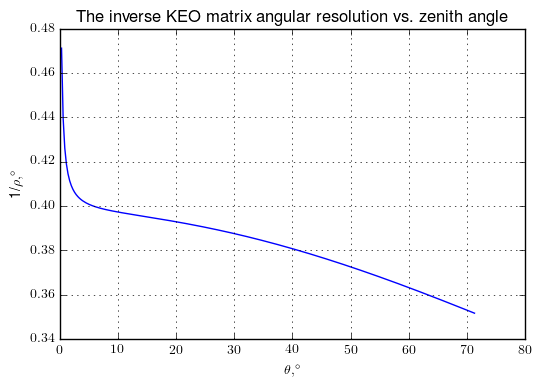

In [8]:
θ_axe=np.linspace(Δθ_pix_keo,255*Δθ_pix_keo,255)
plt.plot(θ_axe*180/np.pi,1/res_angular_keo(0.*np.pi/180,θ_axe)*180/np.pi)
plt.title(r'The inverse KEO matrix angular resolution vs. zenith angle')
plt.xlabel(r'$\theta, ^{\circ}$')
plt.ylabel(r'1/$\rho, ^{\circ}$')
plt.grid()
plt.show()

Из рисунка **выше** видно, что угловое разрешение $\rho$ матрицы камеры **KEO** увеличивается с увеличением зенитного угла c $1/0.47^{\circ}$ до $1/0.35^{\circ}$.  
В спецификации к камере сказано, что оптика KEO Sentinel в центре кадра имеет разрешение $1/0.1^{\circ}$, а на краю кадра - $1/0.5^{\circ}$, т.е. разрешение оптики уменьшается к краю. Получается противоположная динамика.

### Камера **S1C**
Используется т.н. гномоническая (Gnomonic (TAN) projection) проекция.  
![TAN projection](http://www.aanda.org/articles/aa/full/2002/45/aah3860/img220.gif)
В этой проекции расстояние в пикселях от центра кадра до точки с зенитным углом $\theta$ определяется по формуле: $r(\theta)= A \cdot \tan(\theta)$, где $A=const\approx13.97 \frac{pix}{^{\circ}}=800.42 \frac{pix}{rad}$ (для кадров снятых с бинированием 2x2, разрешением 288x288 пикселей). Обратная величина - 0.072 градуса телесного угла на один пиксель (0.00125 радиан на один пиксель).  
Угловое разрешение по зенитному углу $\rho_{\theta}(\theta)=\frac{dr}{d\theta}=\frac{A}{\cos^2(\theta)}$.  
$\Delta\theta_{pix}(\theta) = \frac {1}{\rho(\theta)} = \frac{\cos^2(\theta)}{A}=0.072 \cos^2(\theta) \frac {^{\circ}}{pix} = 0.00125 \cos^2(\theta) \frac {rad}{pix}$ - зенитный угол одного пикселя.  
Угловое разрешение по азимуту $\rho_{\varphi}(\theta)=r(\theta)=A \cdot \tan(\theta)$.  
$\Delta\varphi_{pix}(\theta)=\frac{1}{\rho_{\varphi}(\theta)}=\frac{1}{A\cdot\tan(\theta)}$ - азимут одного пикселя.

Поле зрения объектива можно определить по формуле $D^{S1C}=2\arctan(\frac{144}{A})\approx20.40^{\circ}$ ($25.8^{\circ}$ по спецификации)

In [9]:
# Расчет:
A_s1c=13.97
print('A_s1c=',str(A_s1c))
print('A_s1c_rad =',(A_s1c/np.pi*180))
Δθ_pix_s1c=1/A_s1c
print('Δθ_pix_deg='+str(Δθ_pix_s1c))
Δθ_pix_s1c=Δθ_pix_s1c*np.pi/180
print('Δθ_pix_rad='+str(Δθ_pix_s1c))
D_s1c_deg=2*np.arctan(144/A_s1c*np.pi/180)*180/np.pi
print('D = '+str(D_s1c_deg)+' deg')

A_s1c= 13.97
A_s1c_rad = 800.42203979776
Δθ_pix_deg=0.07158196134574087
Δθ_pix_rad=0.0012493409105184892
D = 20.3974128279 deg


In [10]:
def res_theta_s1c(θ):
    A=13.97/np.pi*180
    ρ_θ=A/np.cos(θ)**2
    return ρ_θ
def res_phi_s1c(θ):
    A=13.97/np.pi*180
    ρ_φ=A*np.tan(θ)
    return ρ_φ

Зная разрешение по зенитному углу ($\rho_{\theta}$) и разрешение по азимуту ($\rho_{\varphi}$) несложно определить общее угловое разрешение 

In [11]:
def res_angular_s1c(φ,θ):
    Δθ=1/res_theta_s1c(θ)
    Δφ=1/res_phi_s1c(θ)
    x1,y1,z1=spheric2cart(1.,φ,θ)
    x2,y2,z2=spheric2cart(1.,φ+Δφ,θ+Δθ)
    ρ=1/np.arccos(1-0.5*((x2-x1)**2+(y2-y1)**2+(z2-z1)**2))
    return ρ

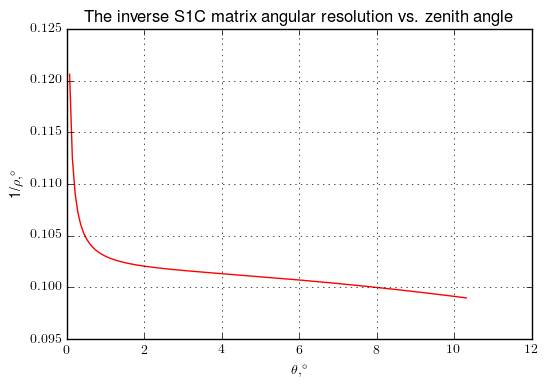

In [12]:
θ_axe=np.linspace(Δθ_pix_s1c,144*Δθ_pix_s1c,144)
plt.plot(θ_axe*180/np.pi,1/res_angular_s1c(0.*np.pi/180,θ_axe)*180/np.pi,'r')
plt.title(r'The inverse S1C matrix angular resolution vs. zenith angle')
plt.xlabel(r'$\theta, ^{\circ}$')
plt.ylabel(r'1/$\rho, ^{\circ}$')
plt.grid()
plt.show()

Из рисунка **выше** видно, что угловое разрешение $\rho$ матрицы камеры **S1C** увеличивается с увеличением зенитного угла c $1/0.121^{\circ}$ до $1/0.98^{\circ}$.

## Способ №2: из формулы для полного телесного угла для объектива с заданным полем зрения

Как известно телесный угол, образуемый конусом с углом раскрыва $2\theta$ вычисляется по формуле: $$\Omega=2\pi(1-\cos(\theta))$$
    Эта формула сразу дает возможность посчитать телесный угол центрального пикселя по известному угловому разрешению $\rho(\theta)$:
$$ \Omega_{pix}\approx\frac{4}{\pi}2\pi(1-\cos(\frac{1}{2\rho(\theta)}))=8(1-\cos(\frac{1}{2\rho(\theta)}))$$
Множитель $\frac{4}{\pi}$ возникает из-за того, что основание конуса - круг, а пиксель квадратный. Это отношение их площадей.

In [13]:
# Расчет для KEO:
Ω_pix_keo_m2_center=8*(1-np.cos(1/2/res_theta_keo(0.)))
print('Ω_pix_keo_m2_center='+str(Ω_pix_keo_m2_center*10**6)+'·10^(-6) sr')
# Расчет для S1C:
Ω_pix_s1c_m2_center=8*(1-np.cos(1/2/res_theta_s1c(Δθ_pix_s1c)))
print('Ω_pix_s1c_m2_center='+str(Ω_pix_s1c_m2_center*10**6)+'·10^(-6) sr')

Ω_pix_keo_m2_center=23.8343014152·10^(-6) sr
Ω_pix_s1c_m2_center=1.56084778702·10^(-6) sr


**Получили** телесный угол центрального пикселя для **KEO** вторым способом:  
$\Omega_{pix}^{KEO} \approx 23.83\cdot10^{-6}$ стерадиан

**Получили** телесный угол центрального пикселя для **S1C** вторым способом:  
$\Omega_{pix}^{S1C} \approx 1.56\cdot10^{-6}$ стерадиан

Чтобы получить выражение для телесного угла произвольного пикселя, нужно посмотреть как получается формула $\Omega=2\pi(1-\cos(\theta))$:
![eq_int](https://wikimedia.org/api/rest_v1/media/math/render/svg/103f2678161ee6af0c7ae9457d771625325c54e1)
Видно, что приращение телесного угла $d\Omega=2\pi\sin(\theta)d\theta$

Получаем, что телесный угол одного пикселя в зависимости от величины зенитного угла определяется как:
$$ \Omega_{pix} (\theta)= 2\pi \sin(\theta) \frac{\Delta\theta_{pix}(\theta)}{N(\theta)} $$
где $N(\theta)=2\pi r(\theta)$ - число пикселей внутри кольца шириной $\Delta\theta_{pix}$ (шириной в один пиксель), т.е. зенитный угол которых находится в диапазоне $[\theta, \theta+\Delta\theta_{pix}]$.
$$ \Omega_{pix} (\theta)= \sin(\theta) \frac{\Delta\theta_{pix}(\theta)}{r(\theta)} $$

### Тогда для **KEO**:
$$\Delta\theta_{pix}(\theta)=\Delta\theta_{pix}=\frac{1}{A}$$
$$r(\theta)=A\cdot\theta$$
$$ \Omega_{pix}^{KEO} (\theta)=\frac{1}{A^2}\frac{\sin(\theta)}{\theta}$$

In [14]:
# Расчет KEO:
def solid_angle_keo(θ):
    A=3.575/np.pi*180
    sol_angle=(1/A**2)*np.sin(θ)/θ
    return sol_angle
print('Ω_pix_keo_m2_center = '+str(solid_angle_keo(Δθ_pix_keo)*10**6)+'·10^(-6) sr')
print('Ω_pix_keo_m2_bord = '+str(solid_angle_keo(72*np.pi/180)*10**6)+'·10^(-6) sr')
print('Ω_pix_keo_m2_glow = '+str(solid_angle_keo(36*np.pi/180)*10**6)+'·10^(-6) sr')

Ω_pix_keo_m2_center = 23.8342185715·10^(-6) sr
Ω_pix_keo_m2_bord = 18.0384453267·10^(-6) sr
Ω_pix_keo_m2_glow = 22.2967446323·10^(-6) sr


**Получили** телесный угол для камеры **KEO** вторым способом *в зависимости от зенитного угла*:  
$\Omega_{pix}^{KEO} (72^{\circ})\approx 18.038\cdot10^{-6}$ стерадиан - для пикселя на границе кадра - **75.68% (-24.32%)** от телесного угла центрального пикселя;  
$\Omega_{pix}^{KEO} (36^{\circ})\approx 22.297\cdot10^{-6}$ стерадиан - для пикселя в области искусственного свечения - **93.55% (-6.45%)** от телесного угла центрального пикселя.

### Тогда для **S1C**:
$$\Delta\theta_{pix}(\theta)=\frac{\cos^2(\theta)}{A}$$
$$r(\theta)=A\cdot\tan(\theta)$$
$$ \Omega_{pix}^{S1C} (\theta)=\frac{1}{A^2}\frac{\sin(\theta)\cos^2(\theta)}{\tan(\theta)}=\frac{1}{A^2}\cos^3(\theta)$$

In [15]:
# Расчет S1C:
def solid_angle_s1c(θ):
    A=13.97/np.pi*180
    sol_angle=(1/A**2)*np.cos(θ)**3
    return sol_angle
print('Ω_pix_s1c_m2_center = '+str(solid_angle_s1c(Δθ_pix_s1c*np.cos(Δθ_pix_s1c)**2)*10**6)+'·10^(-6) sr')
print('Ω_pix_s1c_m2_bord = '+str(solid_angle_s1c(10*np.pi/180)*10**6)+'·10^(-6) sr')
print('Ω_pix_s1c_m2_glow = '+str(solid_angle_s1c(5*np.pi/180)*10**6)+'·10^(-6) sr')

Ω_pix_s1c_m2_center = 1.56084905632·10^(-6) sr
Ω_pix_s1c_m2_bord = 1.49078941286·10^(-6) sr
Ω_pix_s1c_m2_glow = 1.54310188225·10^(-6) sr


**Получили** телесный угол для камеры **S1C** вторым способом *в зависимости от зенитного угла*:  
$\Omega_{pix}^{S1C} (10^{\circ})\approx 1.4908\cdot10^{-6}$ стерадиан - для пикселя на границе кадра - **95.51% (-4.49%)** от телесного угла центрального пикселя;  
$\Omega_{pix}^{S1C} (5^{\circ})\approx 1.5431\cdot10^{-6}$ стерадиан - для пикселя на границе области искусственного свечения - **98.86% (-1.14%)** от телесного угла центрального пикселя.

## Способ №3: по расчитанным угловым разрешениям матриц

Зная разрешение по зенитному углу ($\rho_{\theta}$) и разрешение по азимуту ($\rho_{\varphi}$) матриц можно посчитать и телесный угол одного пикселя:
$$\Omega_{pix} (\theta)= \int_{\varphi}^{\varphi+\Delta\varphi_{pix}}\int_{\theta}^{\theta+\Delta\theta_{pix}} \sin\theta'd\theta'd\varphi'= 2\Delta \varphi_{pix}\sin(\theta+\frac{\Delta\theta_{pix}}{2})sin\frac{\Delta\theta_{pix}}{2}$$
Вспомнив теперь, что $\Delta\theta_{pix}=\frac{1}{\rho_{\theta}(\theta)}$, а $\Delta\varphi_{pix}=\frac{1}{\rho_{\varphi}(\theta)}$, перепишем:
$$ \Omega_{pix} (\theta)= \frac{2}{\rho_{\varphi}(\theta)}\sin(\theta+\frac{1}{2\rho_{\theta}(\theta)})\sin\frac{1}{2\rho_{\theta}(\theta)}$$

### Тогда для **KEO**:

In [16]:
# Расчет KEO:
def solid_angle_keo2(θ):
    sol_angle=2/res_phi_keo(θ)*np.sin(θ+1/2/res_theta_keo(θ))*np.sin(1/2/res_theta_keo(θ))
    return sol_angle
print('Ω_pix_keo_m2_center = '+str(solid_angle_keo2(Δθ_pix_keo)*10**6)+'·10^(-6) sr')
print('Ω_pix_keo_m2_bord = '+str(solid_angle_keo2(72*np.pi/180)*10**6)+'·10^(-6) sr')
print('Ω_pix_keo_m2_glow = '+str(solid_angle_keo2(36*np.pi/180)*10**6)+'·10^(-6) sr')

Ω_pix_keo_m2_center = 35.7511148303·10^(-6) sr
Ω_pix_keo_m2_bord = 18.0526805733·10^(-6) sr
Ω_pix_keo_m2_glow = 22.3715679732·10^(-6) sr


### Тогда для **S1C**:

In [17]:
# Расчет S1C:
def solid_angle_s1c2(θ):
    sol_angle=2/res_phi_s1c(θ)*np.sin(θ+1/2/res_theta_s1c(θ))*np.sin(1/2/res_theta_s1c(θ))
    return sol_angle
print('Ω_pix_s1c_m2_center = '+str(solid_angle_s1c2(Δθ_pix_s1c*np.cos(Δθ_pix_s1c)**2)*10**6)+'·10^(-6) sr')
print('Ω_pix_s1c_m2_bord = '+str(solid_angle_s1c2(10*np.pi/180)*10**6)+'·10^(-6) sr')
print('Ω_pix_s1c_m2_glow = '+str(solid_angle_s1c2(5*np.pi/180)*10**6)+'·10^(-6) sr')

Ω_pix_s1c_m2_center = 2.34127267089·10^(-6) sr
Ω_pix_s1c_m2_bord = 1.49591118707·10^(-6) sr
Ω_pix_s1c_m2_glow = 1.55403556523·10^(-6) sr


## Сравнение трех способов вычисления телесного угла одного пикселя на одном графике

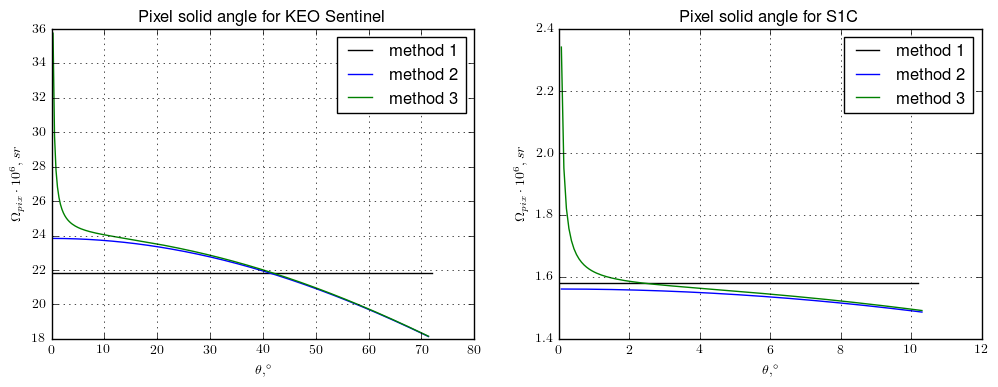

In [33]:
fig=plt.figure(figsize=(12,4))
ax1=plt.subplot(121)
theta_ax1=np.linspace(Δθ_pix_keo,255*Δθ_pix_keo,255)
keo_m1=plt.plot([0, 72],[Ω_pix_keo_m1*10**6, Ω_pix_keo_m1*10**6],'k',label='method 1')
keo_m2=plt.plot(theta_ax1*180/np.pi,solid_angle_keo(theta_ax1)*10**6,label='method 2')
keo_m3=plt.plot(theta_ax1*180/np.pi,solid_angle_keo2(theta_ax1)*10**6,label='method 3')
plt.xlabel(r'$\theta, ^{\circ}$')
plt.ylabel(r'$\Omega_{pix}\cdot10^6, sr$')
plt.title('Pixel solid angle for KEO Sentinel')
plt.grid()
ax1.legend()

ax2=plt.subplot(122)
theta_ax2=np.linspace(Δθ_pix_s1c,144*Δθ_pix_s1c,144)
s1c_m1=plt.plot([0, 10.2],[Ω_pix_s1c_m1*10**6, Ω_pix_s1c_m1*10**6],'k',label='method 1')
s1c_m2=plt.plot(theta_ax2*180/np.pi,solid_angle_s1c(theta_ax2)*10**6,label='method 2')
s1c_m3=plt.plot(theta_ax2*180/np.pi,solid_angle_s1c2(theta_ax2)*10**6,label='method 3')
plt.xlabel(r'$\theta, ^{\circ}$')
plt.ylabel(r'$\Omega_{pix}\cdot10^6, sr$')
plt.title('Pixel solid angle for S1C')
plt.grid()
ax2.legend()

plt.show()

## Выводы:

1. Телесный угол, приходящийся на один пиксель матрицы, **уменьшается к краю кадра** (на 25% для **KEO** и на 5% для **S1C** от значения в центре кадра). Это значит, что угловое разрешение, которое обеспечивает матрица, к краю кадра **увеличивается**, в отличие от углового разрешения, которое обеспечивается оптикой (угловое разрешение объективов уменьшается к краю кадра).
2. В области кадра, где обычно наблюдается искусственное свечение, телесный угол одного пикселя всего лишь **на малую величину** меньше телесного угла в центре кадра (на **~6.5%** для **KEO** и на **~1.15%** для **S1C**).
3. Ранее определенное эффективное фокусное расстояние для **KEO** ($f=6.34$ мм), видимо не совсем точно. Этим можно объяснить разницу между телесными углами центрального пикселя, вычисленными способами 1 и 2. Значение $f=6.06$ мм обеспечит величину $\Omega_{pix}=23.85\cdot10^6$ стерадиан.
4. Первый способ определения телесного угла, приходящегося на один пиксель, строго подходит только для центрального пикселя и не учитывает зависимость телесного угла пикселя от зенитного расстояния.
5. Зависимости величины телесного угла, приходящегося на один пиксель, вычисленные способами **2** и **3**, оказываются близки при значениях $\theta$ начиная от $10^{\circ}$ для **KEO** и от $1^{\circ}$ для **S1C**, и практически совпадают при больших $\theta$. При этом не вполне понятно, чем обусловлена разница между ними вблизи центра кадра.